In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import tqdm as tqdm

In [2]:
class rule30:
    
    
    def __init__(self, init_state, num_iter):
        
        self.state = init_state                # row vector
        self.n     = len(self.state)
        self.N     = num_iter
        self.totState = np.zeros((self.N, self.n))     # num_iter x length_of_vector
        self.totState[0, :] = self.state
        self.count = 0
    
    
    
    def propagate(self):
        
        updated = np.zeros_like(self.state)
        
        for i in range(self.n):
            
            left  = self.state[(i-1)%self.n]
            cent  = self.state[i]
            right = self.state[(i+1)%self.n]
            
            new   = left ^ (cent or right)
            updated[i] = new
        
        self.state = updated
        
        self.count += 1
        
        self.totState[self.count, :] = self.state
    
    
    
    def automaton(self):
        
        fig, ax = plt.subplots()
        ax.axis('off')
        
        w_in_inches = 5;        h_in_inches = 7.5
        
        fig.set_size_inches(w_in_inches, h_in_inches, True)    # set size of the figure
        ims = []                                               # list of lists for the state images 
        
        for self.count in tqdm(range(self.N-1)):
            
            self.propagate()
            im = ax.imshow(self.totState, animated=True)
            ims.append([im])
            
        print('Done propagating through {} iterations'.format(self.count+1))
        
        ani = animation.ArtistAnimation(fig, ims, interval=150, blit=True, repeat_delay=5)

        ani.save("rule30_1.mp4", dpi=600)

In [3]:
init = np.zeros(231).astype(int)
init[115] = 1


# Initial state = 231 length vector of 0s with one 1 at index 115
# 350 number of iterations


r = rule30(init_state=init, num_iter=350)

len(init) =  231


Done propagating through 350 iterations


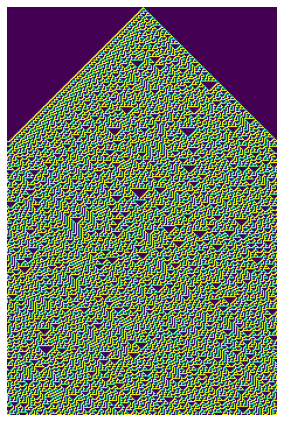

In [4]:
r.automaton()